## Analyze A/B Test Results


## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df=pd.read_csv('ab_data.csv')
df.head(5)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.


+  <span style="color:blue"> **In order to answer it, I used *len()* command.** </span> 

https://note.nkmk.me/en/python-pandas-len-shape-size/#:~:text=Get%20the%20number%20of%20rows%3A%20len(df),-The%20number%20of&text=DataFrame%20can%20be%20obtained%20with,variable%20or%20used%20for%20calculation

In [3]:
print('Row numbers:', len(df))

Row numbers: 294478


c. The number of unique users in the dataset.
+ <span style="color:blue"> ***nunique()* command returns the unique elements in the object.**</span>

https://www.geeksforgeeks.org/python-pandas-index-nunique/#:~:text=nunique()%20function%20return%20number,NaN%20value%20in%20the%20count.


In [4]:
df.user_id.nunique()

290584

d. The proportion of users converted.

In [5]:
df.converted.mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

<span style="color:blue"> **To better understanding, the question indicates 2 aspects:**  </span>

+ <span style="color:blue"> **First one, the columns called <span style="color:red"> landing_page </span> is equal to <span style="color:red"> new_page </span>  and the columns called  <span style="color:red"> group </span> is equal to  <span style="color:red"> group </span>.**</span> 


+ <span style="color:blue"> **Secondly case, when <span style="color:red"> landing_page </span> is equal to <span style="color:red"> old_page </span>  and the columns called <span style="color:red"> group </span> is equal to <span style="color:red"> treatment </span>.** </span>

<span style="color:blue"> **Doing both cases I need to sum them and I will get the number of time that don't match.** </span>.


 <span style="color:blue"> **Observation: Each column just has 2 values such as: <span style="color:red"> landing_page </span> contains <span style="color:red"> new_page </span> and <span style="color:red"> old_page </span>. As well, <span style="color:red"> group </span> column has two caracteristics  <span style="color:red"> group </span> and <span style="color:red"> treatment </span>.** </span>

<span style="color:blue">**So, I read the follow websites:** </span>

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.query.html
https://cmdlinetips.com/2019/07/how-to-select-rows-of-pandas-dataframe-with-query-function/
https://www.w3schools.com/python/ref_list_count.asp



In [6]:
df.query('group == "control"').query('landing_page == "new_page"')['user_id'].count() + df.query('group == "treatment"').query('landing_page == "old_page"')['user_id'].count()


3893

f. Do any of the rows have missing values?

In [7]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

<span style="color:blue">**There aren't missing values. 
I read the follow website to use the command isnull.**  </span>



https://medium.com/analytics-vidhya/python-finding-missing-values-in-a-data-frame-3030aaf0e4fd#:~:text=We%20can%20use%20pandas%20%E2%80%9Cisnull,()%20which%20is%20shown%20below.

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

<span style="color:blue">**In order to answer it. I will save the data that unmatched and then I will drop it.**  </span>

In [8]:
not_match=df.query('group == "control"').query('landing_page == "new_page"')['user_id'] + df.query('group == "treatment"').query('landing_page == "old_page"')['user_id']
not_match.count()

0

In [9]:
df2=df.drop(not_match.index)
df2

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
...,...,...,...,...,...
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0
294476,697314,2017-01-15 01:20:28.957438,control,old_page,0


`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
print('User id unique: ', df2.user_id.nunique())

User id unique:  290584


b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
df2[df2.duplicated('user_id')]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [12]:
df2[df2.user_id ==773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

 <span style="color:blue"> **In order to remove a duplicate <span style="color:red"> user_id </span> , I will <span style="color:red"> drop </span> the last user repeat it, this means the user id whith label=2893.**</span>

<span style="color:blue"> **I read the oficial website in order to aply drop  code.**</span> 
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html

In [13]:
df2.drop(labels=2893, inplace=True, axis=0)

<span style="color:blue"> **To verify if I drop correctly and I don't have duplicate value. I will search for <span style="color:red"> user_id </span> and using <span style="color:red">duplicate </span> code.** </span>

In [14]:
df2.duplicated('user_id').sum()

0

In [15]:
df2[df2.user_id ==773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


**Therefore, I don't have any duplicated value in user_id column.**

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

<span style="color:blue"> **As I can see the column called <span style="color:red">converted </span> just contains 0's and 1's. So, I can use just the comand <span style="color:red"> mean() </span> in order to get the probability.****</span>  



In [16]:
df2.converted.mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [17]:
df2[df2['group']=="control"]['converted'].mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [18]:
df2[df['group']== "treatment"]['converted'].mean()

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


0.11880806551510564

d. What is the probability that an individual received the new page?

In [19]:
(df2.landing_page=="new_page").mean()

0.5000619442226688

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

<span style="color:blue"> **According with my results an individual in the control group is 12% and 11.8% to be in the treatment group.If I quite strict the difference between them is quite higher being in the control group.** </span>

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

<span style = "color: Blue"> According the instruction, I will type some definition in order to understand the concept and doing my null hypothesis. So, I read the follows links. </style> 

+ https://support.minitab.com/en-us/minitab/19/help-and-how-to/statistics/basic-statistics/supporting-topics/basics/type-i-and-type-ii-error/


+ https://www.stat.berkeley.edu/~hhuang/STAT141/Lecture-FDR.pdf



<span style="color:blue"> Type I error, also known as a “false positive”: the error of rejecting a null
hypothesis when it is actually true.</span> 
<span style="color:blue"> The probability of making a type I error is α, which is the level of significance you set for your hypothesis test. An α of 0.05 indicates that you are willing to accept a 5% chance that you are wrong when you reject the null hypothesis. To lower this risk, you must use a lower value for α. However, using a lower value for alpha means that you will be less likely to detect a true difference if one really exists.</span> 


<span style="color:blue">**Based on that, if we want to assume that old page is better our hypothesis null should be:**</span>

<span style="color:orange"> **H0:  P_NEW - P_OLD <=0** </span>
                                            
<span style="color:orange"> **H1:  P_NEW - P_OLD > 0** </span>
                                            
                                            


`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 


<span style="color:blue"> **According with the instructions and under null hypothesis means that 𝑝𝑛𝑒𝑤 is the same as the conversion rate for the entire dataset.**</span>


In [20]:
p_new=df2.converted.mean()
p_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

<span style="color:blue"> **Under null hypothesis *pnew == pold***</span>

In [21]:
p_old=df2.converted.mean()
p_old

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [22]:
n_new=len(df2.query('group == "treatment"')['user_id'])
n_new



145310

d. What is $n_{old}$, the number of individuals in the control group?

In [23]:
n_old=len(df2.query('group == "control"')['user_id'])
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

<span style="color:blue"> **In order to verify that our data are under null hypothesis and if it has a normal distribution or not.**</span>


<span style="color:blue">**I read the follow link to use the command: numpy.random.binomial**</span>

+ https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.random.binomial.html



In [24]:
new_page_converted = np.random.binomial(1, p_new, n_new)
new_page_converted

array([0, 0, 0, ..., 0, 0, 0])

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

<span style="color:blue">**the same reasoning as the previous paragraph but now with p_old.**</span>

In [25]:
old_page_converted = np.random.binomial(1, p_old, n_old)
old_page_converted


array([0, 0, 1, ..., 0, 1, 0])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [26]:
differences =new_page_converted.mean() - old_page_converted.mean()
differences


-0.0002635639011525637

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

<span style="color:blue"> **It's asking to create 10,000 pnew-pold.So, I did an exercise in this course called *completion_rate* where I did 10000 values. I followed the same structure in order to answer the letter *h*.** </span>                                                                          

In [27]:
p_diffs=[]
for _ in range(10000):
    new_page_converted = np.random.binomial(1, p_new, n_new).mean()
    old_page_converted = np.random.binomial(1, p_old, n_old).mean()
    diff=new_page_converted-old_page_converted
    p_diffs.append(diff)
p_diffs=np.array(p_diffs)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

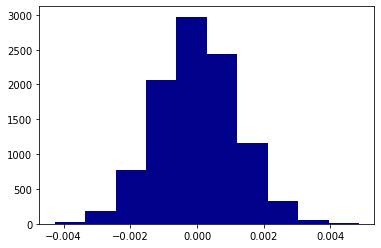

In [28]:
plt.hist(p_diffs, color='darkblue');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [29]:
y=df2[df2['group']=="treatment"]['converted'].mean()
x=df2[df2['group']=="control"]['converted'].mean()
proportion_obs=y-x

+ <span style="color:blue"> **First, I have to save all data into array because p_diffs is a list. Therefore, using np.array allows me to store values of same data type. I read some links in order to do this step and urdestand the concept**</span>

+ <span style="color:blue">https://www.thegeekstuff.com/2013/08/python-array/#:~:text=An%20array%20is%20a%20data,corresponding%20to%20same%20data%20type</span>

+ <span style="color:red"> https://numpy.org/doc/stable/reference/generated/numpy.array.html</span>

<span style="color:blue"> **I have already done the difference between Y and X. So, the question asks for p_diffs > proportion_obs**. </span>

In [30]:
p_diffs=np.array(p_diffs)

In [31]:
print('P_value is:',(p_diffs>proportion_obs).mean())

P_value is: 0.9086


k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

<span style="color:Blue"> I read the book: **An Introduction to Statistical Learning with application in R** in order to give a better interpretation to my results.</span>


<span style="color:Blue"> Bibliography:</span>
+ <span style="color:Blue"> An Introduction to Statistical Learning with application in R, page 67-68.</span>


<span style="color:blue"> P_value is interpreted as follows: a small p_value indicates that it is unlikely to observe such a substantial association between the predictor and the response due to chance, in the absence of any real association  between the preditor and the response. Hence, if we see a small p value, then we can infer that there is an association between the predictor  and response.We reject the null hypothesis  that is, we declare a relationship  to exist between X and Y if the  p -value is small enough. Typical p-value cuttoffs for rejecting the null hypothesis are 5% or 1%.</span>
    
<span style="color:blue"> **P-value calculated was 0.9086 (90.86%). So, *1-0.9086=0.0914*, which indicate that the probability to observe the new page to convert is < than the old page. Thus value, indicate that  I accept the null hypothesis. In order words, **I fail to reject the null hypothesis.**</span>



l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [32]:
import statsmodels.api as sm

C:\Anaconda\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


+ <span style="color:blue"> **First,I will calculate the number of conversions for each page.**</span>
+ <span style="color:blue"> **My variables are: conv_old and cov_new**</span>

In [33]:
conv_old = df2[(df2['landing_page']=="old_page")&(df2['converted']==1)].shape[0]
print('converted old:',conv_old )

conv_new = df2[(df2['landing_page']=="new_page")&(df2['converted']==1)].shape[0]
print('converted new:',conv_new )

converted old: 17489
converted new: 17264


<span style="color:Blue"> **Now, I will calculate the number of individuals who received each page.**</span>

In [37]:
n_old = df2.query("group == 'control'")['user_id'].shape[0]
print('number of individuals in the control group:', n_old)
n_new = df2.query("group == 'treatment'")['user_id'].shape[0]
print('number of individuals in the treatment group:',n_new)

number of individuals in the control group: 145274
number of individuals in the treatment group: 145310


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [34]:
z_score, p_value= sm.stats.proportions_ztest( [ conv_new, conv_old ], [ n_new, n_old ], alternative ='larger' )

print("z_score = {}  and p_value = {}".format(round(z_score,2),round(p_value,4)))

z_score = -1.31  and p_value = 0.9051


<span style="color:blue"> **In order to understand the z value and provide a better interpretation. I am going to calculate the critical value. In addition, I read the follow link.** </span>

+ <span style="color:BLUE"> https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html</span>

<span style="color:Blue"> **Observation: A mentor provide a lead in order to do this step.** </span>

<span style="color:Blue"> **I'm going to assume at 95% confidence level and α=0.5%=0.05, we calculate for one and both side.**</span>

In [36]:
from scipy.stats import norm

#ONE SIDE
print('Critical value in one side:',norm.ppf(1-(0.05)))


#BOTH SIDE: 
print('critical value in both side:',norm.ppf(1-(0.05/2)))



Critical value in one side: 1.6448536269514722
critical value in both side: 1.959963984540054


<span style="color:blue"> **Before to did an interpretation I read the follows links.**</span>


+ <span style="color:red"> https://online.stat.psu.edu/statprogram/reviews/statistical-concepts/hypothesis-testing/critical-value-approach</span>
+<span style="color:red"> https://www.itl.nist.gov/div898/handbook/prc/section1/prc131.htm </span>


<span style="color:BLUE"> **DEFINITION *CRITICAL VALUE***</span>

<span style="color:BLUE"> *The critical value approach involves determining "likely" or "unlikely" by determining whether or not the observed test statistic is more extreme than would be expected if the null hypothesis were true. That is, it entails comparing the observed test statistic to some cutoff value, called the "critical value." If the test statistic is more extreme than the critical value, then the null hypothesis is rejected in favor of the alternative hypothesis. If the test statistic is not as extreme as the critical value, then the null hypothesis is not rejected.*</span>


<span style="color:BLUE"> **We know,If the statistic is less than or equal to the critical value, we fail to reject the null hypothesis. Otherwise it is rejected. I mean:**</span>

+ <span style="color:ORANGE"> z-score <= critical value, then FAIL TO REJECT THE NULL HYPOTHESIS.</span>
+ <span style="color:ORANGE"> z-score > critical value, then REJECT THE NULL HYPOTHESIS</span>

<span style="color:BLUE"> **z-score=-1.31 and critical value= 1.6448. So, -1.31 <= 1.6448 ⁂ I fail to reject the null hypotsis.**</span>


<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

<span style="color:Blue"> I have been analysing the column:converted, which has binary variables. Therefore, It is a **logistic regression.** </span>



b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

<span style="color:blue"> **I followed the steps of the fitting logistic exercise that was carried out in this module to answer parts b and c.**</span>


In [38]:
df2['intercept']=1

ab_page = ['treatment', 'control']
df2['ab_page'] = pd.get_dummies(df2.group)['treatment']
df2.head(5)

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [39]:
log=sm.Logit(df2['converted'],df2[['intercept','ab_page']])
results=log.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [40]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212780.3502
Date:               2021-04-04 21:46 BIC:              212801.5095
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           1                LL-Null:          -1.0639e+05
Df Residuals:       290582           LLR p-value:      0.18988    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

<span style="color:Blue"> **The kind of hypothesis in both cases are different. For instance:**</span>

+ <span style="color:blue"> **The first hypothesis test is based on H0: P_NEW - P_OLD <=0 and the statistical test performs just one side. Meanwhile, in the logic regresion performed the two side.**</span> 
 
        

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

<span style="color:blue"> **My results are not enough to conclude any relationship between conversion and landing page because there isn't lineal relationship. So, it could be interenting if I could explore others variables such as: age, gender and so on. Those could provide perhaps some relationship between them.**</span>


g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [46]:
df_country=pd.read_csv('countries.csv')
df_country.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [47]:
df_total=df_country.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_total.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [48]:
df_total.country.unique()

array(['UK', 'US', 'CA'], dtype=object)

In [49]:
df_total[['UK','CA']]=pd.get_dummies(df_total['country'])[['UK','CA']]
df_total.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,UK,CA
user_id,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,1,0


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [50]:
df_total['intercept']=1
new_log=sm.Logit(df_total['converted'],df_total[['intercept','ab_page','UK','CA']])
new_result=new_log.fit()
new_result.summary2()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212781.1253
Date:               2021-04-04 22:25 BIC:              212823.4439
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           3                LL-Null:          -1.0639e+05
Df Residuals:       290580           LLR p-value:      0.17599    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9893    0.0089  -223.7628  0.0000  -2.0067  -1.9718
ab_page      -0.0149    0.0114    -1.3069  0.1912  -0.0374   0.0075
UK            0.0099    0.0133     0.7433  0.4573  -0.0162   0.0359
CA           -0.0408    0.0269    -1.5161  0.1295  -0.0934   0.0119
==================================================================

"""

## CONCLUSION

<span style="color:blue"> **As I could observe, the summary table showed  higher values that 0.05=5%. So, as I explained before with the theory. All those results proved that I fail to reject the null hypothesis.Therefore, This indicates that the company should stay on the old page at least if they have enough information that could prove that new pages is better.** </span>


<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!




## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [49]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0